In [388]:
from pl_packages import *
from tail_functions import *
from plotting_functions import *
import math

In [392]:
def pl_reg_fit_vec_av(sample,x_m):
    pl_sample=sample[sample>=x_m]
    y_n=len(pl_sample)/len(sample)
    x,y=tail(pl_sample)
    n=len(pareto_sample)
    betas=[]
    for i in range(n-1):
        sample_sub=sample[i:]
        pl_reg_fit_vec_sub=pl_reg_fit(sample_sub,x_m)
        betas.append(pl_reg_fit_vec_sub[3])
    beta=np.mean(betas)
    alpha=y_n*x_m**(-beta)
    y_reg_pred=alpha*x**(beta)
    return betas

def get_freq(sample):
    n_s=len(sample)
    sample_sort=np.sort(sample)
    bins=np.arange(sample_sort[0],sample_sort[-1]+1,1)
    n_b=len(bins)
    bins_freq=np.zeros(n_b)
    i=0
    for j in range(n_b-1):
        c=0
        while i<n_s:
            if bins[j]<=sample_sort[i]<bins[j+1]:
                c+=1
                i+=1
            else:
                bins_freq[j]=c
                break
                
    bins_freq[n_b-2]=n_s-np.sum(bins_freq)
    s=np.sum(bins_freq)
    ind=np.where(bins_freq>0)[0]
        
    return bins[ind], bins_freq[ind]/s

def linear_binning(x, width = 1):
    x_min = min(x)
    x_max = max(x)
    
    bins = np.arange(x_min, x_max + width, width)
    counts, edges = np.histogram(x, bins=bins)
    
    centers = list(map(lambda X, Y: np.sqrt(X * Y), edges[:-1], edges[1:]))
    
    probs = counts / np.sum(counts)
    
    widths = bins[1:] - bins[:-1]
    probs = probs / widths  # normalize
    
    return zip(*((center, count, prob) for center, count, prob, in zip(centers, counts, probs) if count > 0)

In [422]:
b=2
x_m=10
n=5

pareto_sample=pareto.rvs(b, scale=x_m, size=n)
pareto_sample_sort=np.sort(pareto_sample)

In [423]:
pl_reg_fit_vec=pl_reg_fit(pareto_sample,x_m)

print(pl_reg_fit_vec[2],pl_reg_fit_vec[3])

37.931231046434476 1.5789969378253224


In [424]:
pareto_sample_sort

array([14.42382424, 14.96501969, 15.54434951, 15.99791173, 19.17758958])

In [425]:
width=1
bins=np.arange(pareto_sample_sort[0],pareto_sample_sort[-1]+width,width)
counts, edges = np.histogram(pareto_sample,bins=bins)

(array([2, 2, 0, 0, 1]),
 array([14.42382424, 15.42382424, 16.42382424, 17.42382424, 18.42382424,
        19.42382424]))

In [380]:
np.mean(pl_reg_fit_vec_av(pareto_sample,x_m))

1.5735798120084832

In [381]:
pl_reg_fit_vec1=pl_reg_fit(pareto_sample[91:],x_m)

print(pl_reg_fit_vec1[2],pl_reg_fit_vec1[3])

20.375933562801087 1.30911751590943


In [382]:
x,y=tail(pareto_sample)

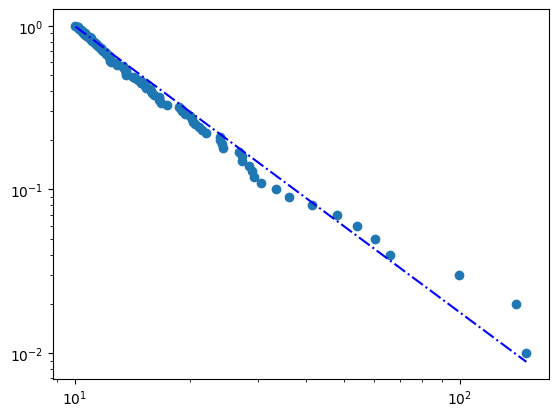

In [383]:
plt.loglog(x,y,'o')

plt.loglog(pl_reg_fit_vec[0],pl_reg_fit_vec[1],color='blue',linestyle='-.',label='LR')

In [409]:
bins,bins_freq=get_freq(pareto_sample)

print(bins,bins_freq)

[ 10.04554953  11.04554953  12.04554953  13.04554953  14.04554953
  15.04554953  17.04554953  18.04554953  19.04554953  20.04554953
  21.04554953  22.04554953  23.04554953  24.04554953  27.04554953
  35.04554953  44.04554953  53.04554953  89.04554953 106.04554953] [0.26 0.06 0.14 0.08 0.08 0.04 0.02 0.02 0.06 0.02 0.02 0.02 0.04 0.02
 0.02 0.02 0.02 0.02 0.02 0.02]


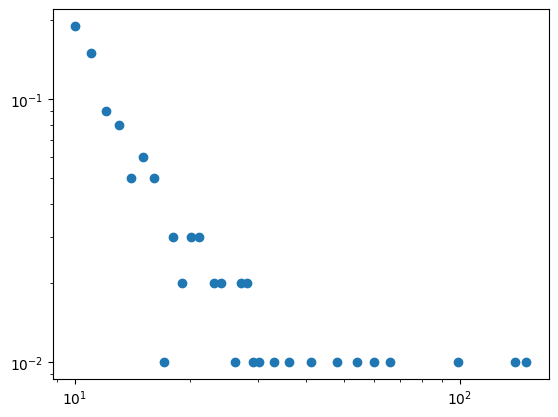

In [385]:
plt.loglog(bins,bins_freq,'o')